###  스타워즈

#### 라이브러리 로드

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
import seaborn as sns

sns.set(font_scale=1) # seaborn 기초 세팅

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

#### 데이터 로드

In [6]:
df = pd.read_csv("../../data/dataset/Starwars.csv")
df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human
...,...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,feminine,NaN,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,masculine,NaN,Human
84,BB8,NaN,NaN,none,none,black,NaN,none,masculine,NaN,Droid
85,Captain Phasma,NaN,NaN,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN


#### 데이터 탐색

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


- name : 이름
- height : 신장
- mass : 체중
- hair_color : 머리 색
- skin_color : 피부 색
- eye_color : 눈동자 색
- birth_year : 생년
- sex : 생물학적 성별
- gender : 생물학적 성별
- homeworld : 고향 행성
- species : 종

> - 범주형 변수 : 빈도 (Frequency) 계산
>  - name, hair_color, skin_color, eye_color, gender, sex, homeworld, species

> - 연속형 변수 : 수치계산이 가능한 데이터
>  - height, mass, birth_year

In [8]:
df.shape

(87, 11)

In [9]:
df.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [10]:
df.describe(include='object')

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


#### 1) 범주형 컬럼 안에 들어있는 유니크 값 확인

In [11]:
df['hair_color'].unique()

array(['blond', nan, 'none', 'brown', 'brown, grey', 'black',
       'auburn, white', 'auburn, grey', 'white', 'grey', 'auburn',
       'blonde', 'unknown'], dtype=object)

> 범주가 적을수록 범주별 그래프를 그리기 쉬움 ( sex, gender ... )

#### 2) 어떤 칼럼에 NaN 값이 있는지 확인

In [12]:
df.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

#### 3) 총 데이터 개수

In [13]:
total = df.shape[0] * df.shape[1]

#### 4) 총 결측치 비율 

In [14]:
ratio = df.isnull().sum().sum() / total * 100
print(f"총 결측치 : {df.isnull().sum().sum()}\n총 결측치 비율 : {ratio}")

총 결측치 : 105
총 결측치 비율 : 10.9717868338558


#### 5) 스타워즈에 등장하는 전체 인물의 숫자

In [15]:
df['name'].nunique()

87

#### 6) 스타워즈에 등장하는 종족 숫자 

In [16]:
df['species'].nunique()

37

### 데이터 전처리

In [17]:
df.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

#### 1) NaN 처리
- fillna()
- dropna()

In [46]:
# height, mass 컬럼 NaN => 0
df.iloc[:, 2].fillna(0,inplace=True)
df.iloc[:, 1].fillna(0,inplace=True)

In [47]:
df.isnull().sum()

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [20]:
df['sex'].unique()

array(['male', 'none', 'female', 'hermaphroditic', nan], dtype=object)

In [21]:
df[df['sex'] == 'none'] # none 비교 가능

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,none,masculine,Tatooine,Droid
21,IG-88,200.0,140.0,none,metal,red,15.0,none,masculine,NaN,Droid
72,R4-P17,96.0,0.0,none,"silver, red","red, blue",NaN,none,feminine,NaN,Droid
84,BB8,NaN,0.0,none,none,black,NaN,none,masculine,NaN,Droid


In [22]:
df[df['sex'].isnull()] # NaN 비교 불가

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
36,Ric Oli?,183.0,0.0,brown,fair,blue,NaN,NaN,NaN,Naboo,NaN
39,Quarsh Panaka,183.0,0.0,black,dark,brown,62.0,NaN,NaN,Naboo,NaN
79,Sly Moore,178.0,48.0,none,pale,white,NaN,NaN,NaN,Umbara,NaN
85,Captain Phasma,NaN,0.0,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN


#### sex == 'none' 인 경우 sex 컬럼의 값을 'robot' 으로 변경

In [23]:
df.loc[df['sex'] == 'none', 'sex'] = 'robot'

### EDA & Visualization

#### 1) 스타워즈 캐릭터의 성별 비율 알아보기

In [24]:
print(df['sex'].unique())
print(df['sex'].nunique())
print(df['sex'].value_counts())

['male' 'robot' 'female' 'hermaphroditic' nan]
4
male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64


In [25]:
gender_data = df['gender'].value_counts()

In [26]:
gender_data.values

array([66, 17], dtype=int64)

<AxesSubplot:xlabel='count', ylabel='sex'>

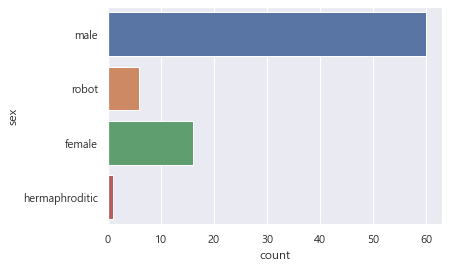

In [27]:
# explode = [0.05, 0.05]
# plt.figure(figsize=(10, 10))
# plt.title("Starwars : Gender", size=18)
# plt.pie(gender_data.values, labels=gender_data.index, autopct="%.1f%%", shadow=True, explode=explode)
# plt.show()

sns.countplot(data=df, y='sex')

#### 2) 스타워즈 캐릭터의 성별에 따른 신장의 분포 알아보기

In [28]:
df['height'].describe()

count     81.000000
mean     174.358025
std       34.770429
min       66.000000
25%      167.000000
50%      180.000000
75%      191.000000
max      264.000000
Name: height, dtype: float64

In [29]:
print(f"왜도 : {df['height'].skew()}")
print(f"첨도 : {df['height'].kurt()}")

왜도 : -1.0645924737589698
첨도 : 2.0969653827126526


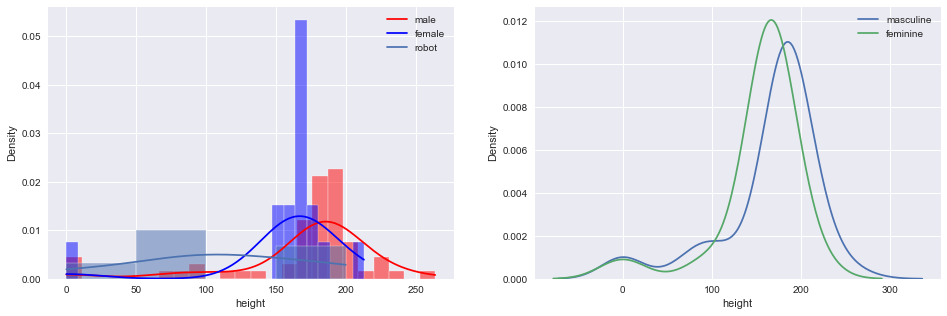

In [48]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df[df['sex'] == 'male']['height'], ax = ax[0], kde=True, stat='density', color='red')
sns.histplot(df[df['sex'] == 'female']['height'], ax = ax[0], kde=True, stat='density', color='blue')
sns.histplot(df[df['sex'] == 'robot']['height'], ax = ax[0], kde=True, stat='density')
ax[0].legend(['male', 'female', 'robot'])

# kedplot : 확률 분포를 부드럽게 그려줌
sns.kdeplot(df[df['gender'] == 'masculine']['height'], ax=ax[1])
sns.kdeplot(df[df['gender'] == 'feminine']['height'], ax=ax[1])
ax[1].legend(['masculine', 'feminine'])

#### 3) 가장 무거운 캐릭터와 가장 가벼운 캐릭터 알아보기
- 단, 가장 가벼운 캐릭터의 경우 0 을 제외한다

In [31]:
df_min = df[df['mass'] > 0]

In [32]:
df_min[df_min['mass'] == min(df_min['mass'])]['name'].values

array(['Ratts Tyerell'], dtype=object)

In [33]:
df_min[df_min['mass'] == max(df_min['mass'])]['name'].values

array(['Jabba Desilijic Tiure'], dtype=object)

In [34]:
print(f"{df_min[df_min['mass'] == min(df_min['mass'])]['name'].values} 의 몸무게가 {min(df_min['mass'])} 로 가장 가볍다.")
print(f"{df_min[df_min['mass'] == max(df_min['mass'])]['name'].values} 의 몸무게가 {max(df_min['mass'])} 로 가장 무겁다.")

['Ratts Tyerell'] 의 몸무게가 15.0 로 가장 가볍다.
['Jabba Desilijic Tiure'] 의 몸무게가 1358.0 로 가장 무겁다.


#### 4) 스타워즈 캐릭터의 키와 몸무게는 상관관계가 있는지 알아보기

In [35]:
weight = df[['species', 'mass']].groupby('species').mean()
weight.head()

,mass
species,
Aleena,15.0
Besalisk,102.0
Cerean,82.0
Chagrian,0.0
Clawdite,55.0


In [36]:
# 몸무게 많이 나가는 순으로 상위 10개 종족의 몸무게를 bar 그래프로 생성
weight.sort_values('mass', ascending=False, inplace=True)

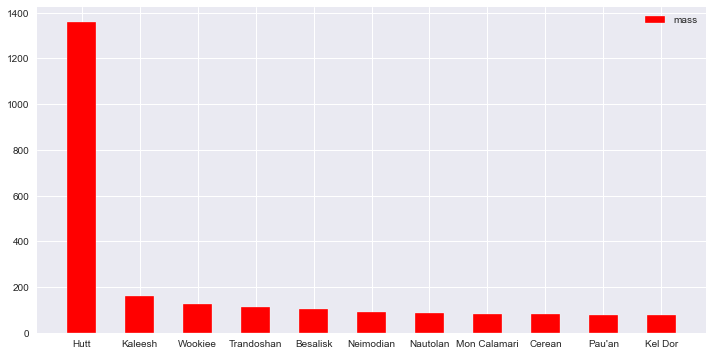

In [37]:
plt.figure(figsize=(12,6))
plt.bar(x=weight.index[:11], height=weight['mass'][:11], width=0.5, color='red', label='mass')
plt.legend()
plt.show()

#### 5) 스타워즈 캐릭터의 몸무게 - 키 의 상관관계
- 몸무게가 1358, 0 인 캐릭터 제외

In [38]:
df.shape

(87, 11)

In [39]:
out1 = ~df['species'].isin(['Hutt'])

In [40]:
out2 = ~df['mass'].isin([0.0])

In [41]:
df.loc[out1 & out2].shape

(58, 11)

<AxesSubplot:xlabel='height', ylabel='mass'>

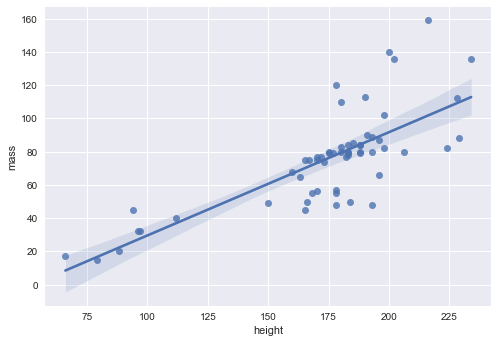

In [42]:
sns.regplot(data=df.loc[out1 & out2], x='height', y='mass')

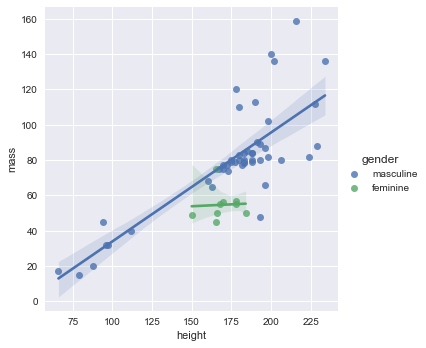

In [43]:
sns.lmplot(data=df.loc[out1 & out2], x='height', y='mass', hue='gender')